## Lifestyle and Wellbeing Data
This dataset is available in https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data?resource=download. The survey used to gather this data can be found in http://www.authentic-happiness.com/your-life-satisfaction-score and includes 24 attributes describing how we live our lives, including a calculated field, the WorkLifeBalance_Score. After exploring the data, it was built two different machine learning models in order to predict the body mass index-(BMI) from the lifestyle of the respondents.

The dataset has 15,971 survey responses and 24 features described below:

    
**Timestamp** - Date when survey was submitted.


**FRUITS_VEGGIES** - HOW MANY FRUITS OR VEGETABLES DO YOU EAT EVERYDAY?


**DAILY_STRESS** - HOW MUCH STRESS DO YOU TYPICALLY EXPERIENCE EVERYDAY?


**PLACES_VISITED** - HOW MANY NEW PLACES DO YOU VISIT? * Over a period of 12 months.


**CORE_CIRCLE** - HOW MANY PEOPLE ARE VERY CLOSE TO YOU? * i.e. close family and friends ready to provide you with a long-term unconditional support.


**SUPPORTING_OTHERS** - HOW MANY PEOPLE DO YOU HELP ACHIEVE A BETTER LIFE?


**SOCIAL_NETWORK** - WITH HOW MANY PEOPLE DO YOU INTERACT WITH DURING A TYPICAL DAY? 


**ACHIEVEMENT** - HOW MANY REMARKABLE ACHIEVEMENTS ARE YOU PROUD OF? * Over the last 12 months.


**DONATION** - HOW MANY TIMES DO YOU DONATE YOUR TIME OR MONEY TO GOOD CAUSES? * Over a period of 12 months. 


**BMI_RANGE** - WHAT IS YOUR BODY MASS INDEX (BMI) RANGE?


**TODO_COMPLETED** - HOW WELL DO YOU COMPLETE YOUR WEEKLY TO-DO LISTS?


**FLOW** - IN A TYPICAL DAY, HOW MANY HOURS DO YOU EXPERIENCE "FLOW"? Flow is defined as the mental state, in which you are fully immersed in performing an activity.


**DAILY_STEPS** - HOW MANY STEPS (IN THOUSANDS) DO YOU TYPICALLY WALK EVERYDAY?


**LIVE_VISION**  -  FOR HOW MANY YEARS AHEAD IS YOUR LIFE VISION VERY CLEAR FOR? 


**SLEEP_HOURS** - ABOUT HOW LONG DO YOU TYPICALLY SLEEP?


**LOST_VACATION** - HOW MANY DAYS OF VACATION DO YOU TYPICALLY LOSE EVERY YEAR?


**DAILY_SHOUTING** - HOW OFTEN DO YOU SHOUT OR SULK AT SOMEBODY? * In a typical week.


**SUFFICIENT_INCOME** - HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC LIFE EXPENSES?


**PERSONAL_AWARDS** - HOW MANY RECOGNITIONS HAVE YOU RECEIVED IN YOUR LIFE? 


**TIME_FOR_PASSION** - HOW MANY HOURS DO YOU SPEND EVERYDAY DOING WHAT YOU ARE PASSIONATE ABOUT? 


**WEEKLY_MEDITATION** - IN A TYPICAL WEEK, HOW MANY TIMES DO YOU HAVE THE OPPORTUNITY TO THINK ABOUT YOURSELF?


**AGE** - YOUR AGE RANGE.


**GENDER** - YOUR GENDER.


**WORK_LIFE_BALANCE_SCORE** - CALCULATED SCORE.

## Imports


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting and checking the data

In [25]:
data = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

In [26]:
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [27]:
data.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

As we can see, timestamp, gender, daily_stress and age are not integers.

Converting the column names to lower case

In [29]:
data.columns= data.columns.str.lower()

In [30]:
data.columns

Index(['timestamp', 'fruits_veggies', 'daily_stress', 'places_visited',
       'core_circle', 'supporting_others', 'social_network', 'achievement',
       'donation', 'bmi_range', 'todo_completed', 'flow', 'daily_steps',
       'live_vision', 'sleep_hours', 'lost_vacation', 'daily_shouting',
       'sufficient_income', 'personal_awards', 'time_for_passion',
       'weekly_meditation', 'age', 'gender', 'work_life_balance_score'],
      dtype='object')

## Timestamp

In [31]:
data['timestamp'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
15967    <class 'str'>
15968    <class 'str'>
15969    <class 'str'>
15970    <class 'str'>
15971    <class 'str'>
Name: timestamp, Length: 15972, dtype: object

In [32]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

## Exploratory data analysis

How features are correlated with work_life_balance_score-WLBS?

In [33]:
data.corr()['work_life_balance_score'] 

fruits_veggies             0.452255
places_visited             0.529615
core_circle                0.507541
supporting_others          0.548851
social_network             0.412586
achievement                0.561244
donation                   0.458829
bmi_range                 -0.251988
todo_completed             0.545503
flow                       0.478199
daily_steps                0.422981
live_vision                0.471311
sleep_hours                0.196395
lost_vacation             -0.266243
daily_shouting            -0.273153
sufficient_income          0.403561
personal_awards            0.504224
time_for_passion           0.516967
weekly_meditation          0.416171
work_life_balance_score    1.000000
Name: work_life_balance_score, dtype: float64

How WLBS varies through the years?

In [34]:
data['year'] = data['timestamp'].apply(lambda x: x.year)  


<AxesSubplot:xlabel='year', ylabel='count'>

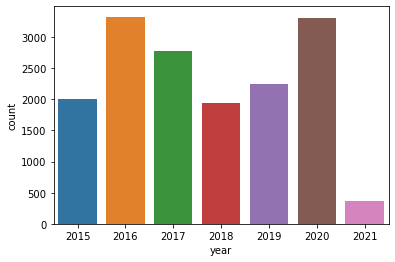

In [35]:
sns.countplot(x=data['year'],data=data)

<AxesSubplot:xlabel='year', ylabel='work_life_balance_score'>

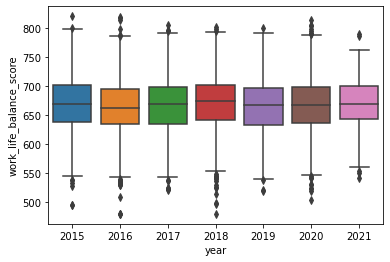

In [36]:
sns.boxplot(x=data['year'],y=data['work_life_balance_score'],data=data)

Even though the number of respondents varies, the median of WLBS doesn't present significant variation along the years

 ## DAILY_STRESS

Daily_stress values are strings, but before converting them to integers, lets get rid of a specific row which has a weird value "1/1/00"


In [37]:
data.drop(data.index[10005],inplace=True)  

In [38]:
sum(data['daily_stress']=="1/1/00") 

0

Now, we can convert the DAILY_STRESS values to int64

In [39]:
data['daily_stress'] = data['daily_stress'].astype(np.int64)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                15971 non-null  datetime64[ns]
 1   fruits_veggies           15971 non-null  int64         
 2   daily_stress             15971 non-null  int64         
 3   places_visited           15971 non-null  int64         
 4   core_circle              15971 non-null  int64         
 5   supporting_others        15971 non-null  int64         
 6   social_network           15971 non-null  int64         
 7   achievement              15971 non-null  int64         
 8   donation                 15971 non-null  int64         
 9   bmi_range                15971 non-null  int64         
 10  todo_completed           15971 non-null  int64         
 11  flow                     15971 non-null  int64         
 12  daily_steps              15971 n

In the survey used to obtain this dataset, people answered how much stress on a scale from 0 (not much stress) to 5 (a lot of stress) they typically experience everyday. Thus let's see the percentage of people under this stress scale.

In [41]:
stress_percentage = data['daily_stress'].value_counts()*100/data.shape[0]

Text(0.5, 1.0, 'Percentage of respondents per  daily stress ')

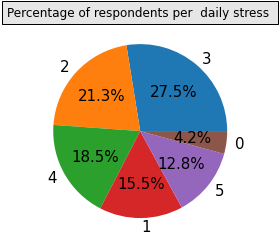

In [42]:
plt.pie(stress_percentage, labels=stress_percentage.index, autopct='%1.1f%%',textprops={'fontsize': 15})
plt.title('Percentage of respondents per  daily stress ',bbox={'facecolor':'0.9', 'pad':5})

Around 30 % of respondents are under a lot of daily stress.

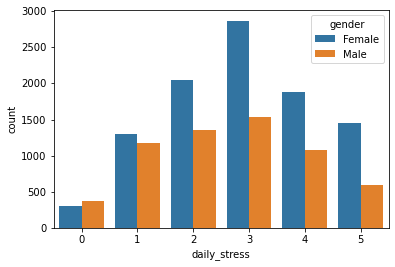

In [43]:
ax = sns.countplot(x="daily_stress", hue = "gender", data=data)
plt.savefig('gender-stress.pdf', format='pdf')

We infer from the countplot above that more women declared to experience a lot of stress than men. However, we should check how balanced is our input data.

In [44]:
fem_tot = data['gender'].value_counts()[0]
male_tot = data['gender'].value_counts()[1]
print(fem_tot * 100 / (fem_tot + male_tot))
print(male_tot * 100 / (fem_tot + male_tot))

61.724375430467724
38.275624569532276


About 62% of the total dataset is represented by women.

Thus, let's see how much of each group answered to experience lots of strees during the day.

In [45]:
fem = data[data['daily_stress'] >= 3]['gender'].value_counts()[0]
male = data[data['daily_stress'] >= 3]['gender'].value_counts()[1]

In [46]:
fem_percen = fem * 100 / fem_tot
mal_percen = male * 100 / male_tot
print(fem_percen)
print(mal_percen)

62.97423412456888
52.3801734009488


Therefore, when we calculate the percentage of men and women in both groups (female and male) subjected to much stress (3 or more on the scale), we have about 63% in the women group while in the men group the percentage is around 52%. Thus, due to the fact that most of the respondents are women, it seems that much more women are under lots of stress. However, the proportion in each group is not very different from each other.

How are features correlated with daily stress?

In [47]:
data.corr()['daily_stress']

fruits_veggies            -0.094535
daily_stress               1.000000
places_visited            -0.134857
core_circle               -0.120238
supporting_others         -0.029852
social_network             0.020930
achievement               -0.110943
donation                  -0.037721
bmi_range                  0.083110
todo_completed            -0.163727
flow                      -0.129903
daily_steps               -0.065511
live_vision               -0.134155
sleep_hours               -0.157037
lost_vacation              0.196953
daily_shouting             0.302669
sufficient_income         -0.144573
personal_awards           -0.042535
time_for_passion          -0.158141
weekly_meditation         -0.218660
work_life_balance_score   -0.365399
year                       0.011334
Name: daily_stress, dtype: float64

As we can see, features that correlates the most to daily stress exposure are daily_shouting and lost_vacation.

## BMI RANGE

<AxesSubplot:xlabel='bmi_range', ylabel='count'>

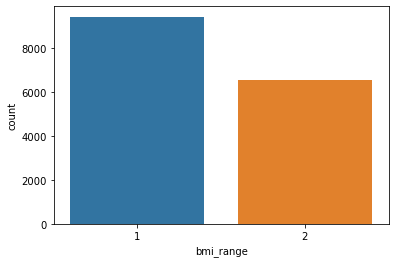

In [48]:
sns.countplot(x='bmi_range',data=data)

Most of the respondents declared to have a bmi value below 25. 

In [49]:
data['bmi_range'].value_counts()

1    9413
2    6558
Name: bmi_range, dtype: int64

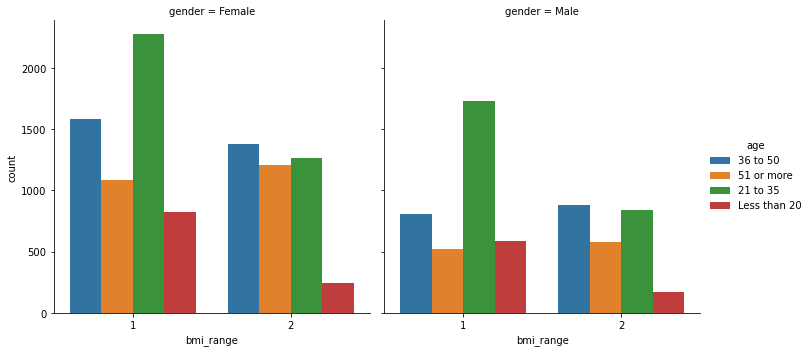

In [50]:
ax = sns.catplot(x="bmi_range", kind="count", hue="age", col = "gender", data=data)

The range with more people with a bmi value under 25 is from 21 to 35.

## Data preparation

The columns "age", "gender", "todo-completed", "sufficient_income" and "daily_stress" are categorical features, so let's make them dummy variables in order to use them in our machine learning models.

In [51]:
data = pd.get_dummies(data, columns=['gender','age','todo_completed','sufficient_income','daily_stress'], drop_first=True)

In [52]:
data.head()

,timestamp,fruits_veggies,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,flow,...,todo_completed_7,todo_completed_8,todo_completed_9,todo_completed_10,sufficient_income_2,daily_stress_1,daily_stress_2,daily_stress_3,daily_stress_4,daily_stress_5
0,2015-07-07,3,2,5,0,5,2,0,1,4,...,0,0,0,0,0,0,1,0,0,0
1,2015-07-07,2,4,3,8,10,5,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,2015-07-07,2,3,4,4,10,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0
3,2015-07-07,3,10,3,10,7,2,5,2,5,...,0,0,0,0,0,0,0,1,0,0
4,2015-07-07,5,3,3,10,4,2,4,2,0,...,0,0,0,0,1,1,0,0,0,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                15971 non-null  datetime64[ns]
 1   fruits_veggies           15971 non-null  int64         
 2   places_visited           15971 non-null  int64         
 3   core_circle              15971 non-null  int64         
 4   supporting_others        15971 non-null  int64         
 5   social_network           15971 non-null  int64         
 6   achievement              15971 non-null  int64         
 7   donation                 15971 non-null  int64         
 8   bmi_range                15971 non-null  int64         
 9   flow                     15971 non-null  int64         
 10  daily_steps              15971 non-null  int64         
 11  live_vision              15971 non-null  int64         
 12  sleep_hours              15971 n

Lets drop the timestamp column

In [54]:
data.drop(['timestamp'],axis=1,inplace=True)

After exploring this dataset, let's use the 'bmi_range' as our target and try to predict it based in the input features.

## Choosing the data

In [55]:
target = data['bmi_range']

print('bmi corr: ')
print(data.corr()['bmi_range'].sort_values(ascending = False))

bmi corr: 
bmi_range                  1.000000
age_51 or more             0.120770
age_36 to 50               0.097905
donation                   0.064543
daily_shouting             0.060470
daily_stress_5             0.055688
year                       0.043691
supporting_others          0.038558
lost_vacation              0.036683
daily_stress_4             0.031303
todo_completed_3           0.029295
flow                       0.026761
todo_completed_1           0.021463
social_network             0.019843
todo_completed_4           0.019613
personal_awards            0.019007
todo_completed_2           0.013884
daily_stress_3             0.013704
todo_completed_6           0.010129
todo_completed_5           0.005653
live_vision                0.000088
time_for_passion          -0.006237
gender_Male               -0.010766
sufficient_income_2       -0.011863
todo_completed_10         -0.013517
achievement               -0.019699
todo_completed_8          -0.024276
todo_completed_7 

Dropping the data to be predicted

In [56]:
data_for_prediction = data.drop(columns =['bmi_range','work_life_balance_score'])
data_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   fruits_veggies       15971 non-null  int64
 1   places_visited       15971 non-null  int64
 2   core_circle          15971 non-null  int64
 3   supporting_others    15971 non-null  int64
 4   social_network       15971 non-null  int64
 5   achievement          15971 non-null  int64
 6   donation             15971 non-null  int64
 7   flow                 15971 non-null  int64
 8   daily_steps          15971 non-null  int64
 9   live_vision          15971 non-null  int64
 10  sleep_hours          15971 non-null  int64
 11  lost_vacation        15971 non-null  int64
 12  daily_shouting       15971 non-null  int64
 13  personal_awards      15971 non-null  int64
 14  time_for_passion     15971 non-null  int64
 15  weekly_meditation    15971 non-null  int64
 16  year                 1

## Spliting the data
Now we split the data into training and testing sets. 

In [57]:
data.columns

Index(['fruits_veggies', 'places_visited', 'core_circle', 'supporting_others',
       'social_network', 'achievement', 'donation', 'bmi_range', 'flow',
       'daily_steps', 'live_vision', 'sleep_hours', 'lost_vacation',
       'daily_shouting', 'personal_awards', 'time_for_passion',
       'weekly_meditation', 'work_life_balance_score', 'year', 'gender_Male',
       'age_36 to 50', 'age_51 or more', 'age_Less than 20',
       'todo_completed_1', 'todo_completed_2', 'todo_completed_3',
       'todo_completed_4', 'todo_completed_5', 'todo_completed_6',
       'todo_completed_7', 'todo_completed_8', 'todo_completed_9',
       'todo_completed_10', 'sufficient_income_2', 'daily_stress_1',
       'daily_stress_2', 'daily_stress_3', 'daily_stress_4', 'daily_stress_5'],
      dtype='object')

In [58]:
X = data_for_prediction

In [59]:
y = target

In [60]:
from sklearn.model_selection import train_test_split

using 'stratify' in the splitting to make sure that the train_test_split will return training and test subsets with the same proportions of class labels as the input dataset.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

Once we splitted our dataset, let's run two different classifier models in order to see how able they are to make good predictions.

## Experiment I : Random Forest Model

## Training the Model


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier()

In [64]:
model.fit(X_train,y_train)


RandomForestClassifier()

## Predicting Test Data
Now that we have fitted our model, let's evaluate its performance by predicting off the test values.

In [65]:
prediction = model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, prediction)
score

0.6546327212020033

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.67      0.82      0.74      2824
           2       0.62      0.42      0.50      1968

    accuracy                           0.65      4792
   macro avg       0.64      0.62      0.62      4792
weighted avg       0.65      0.65      0.64      4792



## Confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

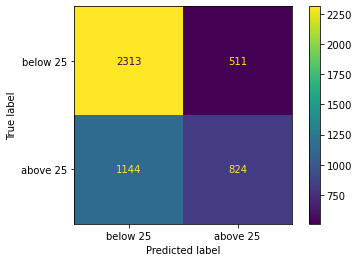

In [70]:
cm = confusion_matrix(y_test,prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['below 25','above 25'])
cmd.plot()

Now lets run a logistic regression model to compare with our previous model.

## Experiment II : Logistic Regression



In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression(max_iter=1000)

In [73]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Predictions and Evaluations 

In [74]:
predictions = logmodel.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.66      0.79      0.72      2824
           2       0.57      0.41      0.48      1968

    accuracy                           0.63      4792
   macro avg       0.61      0.60      0.60      4792
weighted avg       0.62      0.63      0.62      4792



## Confusion matrix

In [77]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

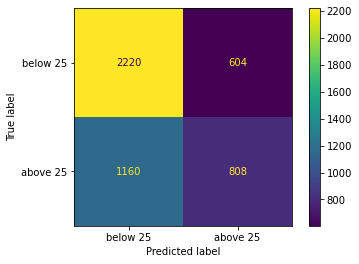

In [78]:
cm = confusion_matrix(y_test,predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['below 25','above 25'])
cmd.plot()

As we can see, the logistic regression model (as well as the random forest model) is predicting many cases belonging class 1 (below 25) when the true label is  in fact class 2 (above 25). To make sure that the model is certain that a case belongs to class 1, we guarantee that it only predicts that an example belongs to this class when the probability is equal or above 58%, which represents the percentage of respondents who declared to belong to class 1.

## Predictions and Evaluations - Increasing Threshold


In [79]:
probab = logmodel.predict_proba(X_test)

In [80]:
def zeros_to_two(x):
    if x == 0:
        return 2
    return 1

predictions2 = list(map(zeros_to_two, (probab[:,0] >= 0.58) * 1))

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           1       0.70      0.64      0.67      2824
           2       0.54      0.61      0.57      1968

    accuracy                           0.63      4792
   macro avg       0.62      0.62      0.62      4792
weighted avg       0.64      0.63      0.63      4792



## Confusion matrix

In [227]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

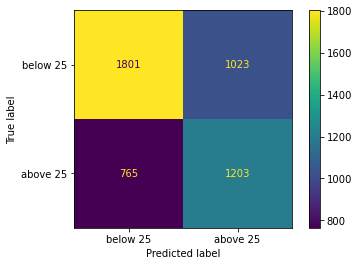

In [228]:
cm = confusion_matrix(y_test,predictions2)
cmd = ConfusionMatrixDisplay(cm, display_labels=['below 25','above 25'])
cmd.plot()

By making the model only predicting an example as belonging to class 1 when the probability is higher than 58 % did not increase the accuracy, but on the other hand the true positive and true negative classes are much better predicted by the model, as a consequence the other metrics for class 2 were much improved. 

Another possibility to optimize the logistic regression model proposed here is to use GridSearchCV for hyperparameters tuning.

## GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameters = {
    'max_iter': [1000,10000],
    'penalty' : ['l1','l2','elasticnet'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear','sag'],
    'random_state':[0,42],
    'multi_class':['auto', 'ovr', 'multinomial']
}

In [68]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10) 

In [69]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [1000, 10000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0, 42],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

In [70]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
Accuracy : 0.6554226997628134


By performing a parameters tunig the accuracy did not increased significantly.